<h1>Get single cell data from
    adult ovaries at different stages of the estrous cycle</h1>
    <br>
Morris et al. isolated the ovaries at each stage of estrous cycling (proestrus, estrus, metestrus, diestrus), post-partum non-lactating , post-partum lactating, and non-monitored mice to increase sample diversity and cell counts. <br><br>
6–8 weeks	Wild-type C57BL6	All ovarian cells	https://osf.io/924fz/
	(Morris et al. 2022)
<br>

In [19]:
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)
library(dplyr)

In [2]:
pbmc <- readRDS("data/ovary_0.rds")
pbmc

An object of class Seurat 
23657 features across 34712 samples within 1 assay 
Active assay: RNA (23657 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [4]:
  prot_coding <-  read.delim("data/prot_coding.csv", header = FALSE, sep = ",", dec = ".")$V2
  prot_coding <- prot_coding[!prot_coding %in% prot_coding[grep("^mt-",prot_coding)]]
  prot_coding <- prot_coding[!prot_coding %in% prot_coding[grep("^Rb",prot_coding)]]
  prot_coding <- prot_coding[!prot_coding %in% prot_coding[grep("^Rp",prot_coding)]] 
  #, variable.features.n = 1000,do.scale = TRUE 
  pbmc <- pbmc[rownames(pbmc) %in% prot_coding,]

Warning message:
“Not all features provided are in this Assay object, removing the following feature(s): H2.Aa, H2.Eb1, Igkc, Hba.a2, Hba.a1, Hbb.bt, Hbb.bs, H2.Ab1, Trbc2, Acod1, Tcrg.C1, Iglc1, Iglc3, Tcrg.C4, Trbc1, Igha, H2.K1, H19, Ighd, Adgre1, X8430408G22Rik, Tcrg.C2, Xist, Ighm, X4930579O11Rik, Fcmr, Trac, Kcnmb4os1, Ighv5.2, Plpp1, Fpr.rs7, X1700018C11Rik, Trdv1, X1110032F04Rik, Gm10398, Gm11985, X1700023C21Rik, X4930562A09Rik, Trdc, X5430401F13Rik, Ighv2.9, H2.D1, X1810049J17Rik, Gm14022, Plpp3, Krtap6.1, X4933406M09Rik, X1700061J23Rik, X1190002N15Rik, H2.DMb1, Gm28505, Gm20069, Krtap3.3, Tcrg.V6, Gm14040, Trav1, A430048G15Rik, Vmn2r122, Krtap31.1, X1700111N16Rik, Gm29642, X4930504O13Rik, Gm19585, Gad1.ps, H2.DMa, X2210407C18Rik, X1700027A07Rik, Krtap20.2, H2.Q7, Gm4956, Tcrg.C3, Gm3880, Cd300c2, Gm13631, X4930563H07Rik, Gm13599, Gm15562, A630023P12Rik, Gm11337, Gas5, Vsir, Neat1, Gm42620, Gm11586, Gm28548, H2.Oa, X2010110G14Rik, Gm28706, Rbp1, X4930579G18Rik, Gm13049, Gm4427

In [6]:
head(pbmc@meta.data)

,nGene,nUMI,orig.ident,batch,fraction.mito,condition,dominant_index,percent_dominant,Level0,doubletSimScore,doubletSimCall,mouse,Level1,Level2,nCount_RNA,nFeature_RNA
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<int>
mary_34557529_1.1.1A_000093,4944,12529,mary,cycling,0.07614335,E,0,100,Granulosa,0.15204082,0,1A,GC_CL_Active,GC_CL_Active,4066.884,4518
mary_34557529_1.1.1A_000112,944,1468,mary,cycling,0.10626703,E,0,100,Granulosa,0.04653061,0,1A,GC_Mitotic,GC_Mitotic,1856.100,834
mary_34557529_1.1.1A_000188,1648,3312,mary,cycling,0.10537440,E,0,100,Granulosa,0.11285714,0,1A,GC_Estrous,GC_Estrous,2465.875,1504
mary_34557529_1.1.1A_000199,919,1617,mary,cycling,0.10946197,E,0,100,Granulosa,0.07428571,0,1A,GC_Estrous,GC_Estrous,1793.657,832
mary_34557529_1.1.1A_000281,1626,3080,mary,cycling,0.13441558,E,0,100,Granulosa,0.08061224,0,1A,GC_Mitotic,GC_Mitotic,2423.957,1468
mary_34557529_1.1.1A_000384,1021,1858,mary,cycling,0.14962325,E,0,100,Granulosa,0.05040816,0,1A,GC_Estrous,GC_Estrous,1883.312,916


In [7]:
pbmc <- SCTransform(pbmc, ncells = 3000, verbose = FALSE)


In [8]:
pbmc <- RunPCA(pbmc)
pbmc <- RunUMAP(pbmc, dims = 1:20)
pbmc <- FindNeighbors(pbmc, reduction = "pca", dims = 1:20)
pbmc <- FindClusters(pbmc, resolution = 0.5)

PC_ 1 
Positive:  Inha, Akr1cl, Serpine2, Bex4, Nr5a2, Prkar2b, Gja1, Cpe, Wbp5, Hsd3b1 
	   Socs2, Fst, Scd2, Foxo1, Tenm4, Hsd17b1, Lect1, Ivns1abp, Mid1ip1, Kctd14 
	   Ephx2, Dag1, Acsbg1, Cyb5a, St3gal5, Sulf2, Tdrd5, Ptprd, Ctsl, Slc18a2 
Negative:  Tmsb4x, Lyz2, Igfbp7, B2m, Cd74, Cd93, C1qb, Fcer1g, Srgn, Ctss 
	   Kdr, C1qc, Laptm5, Mmrn2, C1qa, Cdh5, Ly6e, Cybb, Csf1r, Esam 
	   Mpeg1, Nrp1, Tyrobp, Flt1, Eng, Pecam1, Cldn5, Egfl7, Lcp1, Ctla2a 
PC_ 2 
Positive:  Igfbp7, Col1a2, Col3a1, Col4a1, Col1a1, Col4a2, Mgp, Sparc, Sparcl1, Bgn 
	   Fstl1, Dcn, Ogn, Ltbp4, Tcf21, Nid1, Mylk, Acta2, Lum, Pdgfra 
	   Serping1, Sptbn1, Cygb, Nr2f2, Col6a2, Tpm1, Cxcl14, Mdk, Cfh, Emilin1 
Negative:  Lyz2, C1qb, Cd74, Ctss, C1qc, Fcer1g, Laptm5, C1qa, Cybb, Csf1r 
	   Mpeg1, Tyrobp, Ly86, Cd53, Ptprc, Cd52, Il1b, Fcgr3, Cxcl2, Rgs1 
	   Cd83, Itgb2, Cx3cr1, Lcp1, Cd14, Ms4a6b, Ccl6, Rac2, Gpr65, C3ar1 
PC_ 3 
Positive:  Col1a2, Col3a1, Col1a1, Mgp, Dcn, Ogn, Bgn, Tcf21, Lum, Pdgfra 
	   Ap

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 34712
Number of edges: 1301707

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9414
Number of communities: 20
Elapsed time: 8 seconds


In [9]:
pbmc

An object of class Seurat 
36228 features across 34712 samples within 2 assays 
Active assay: SCT (17773 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

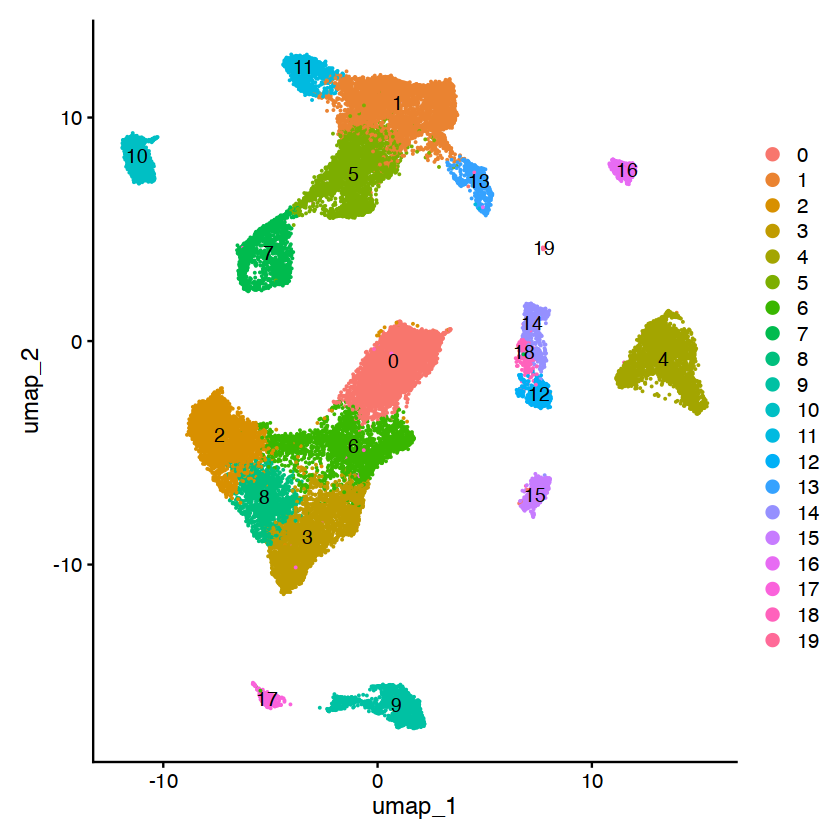

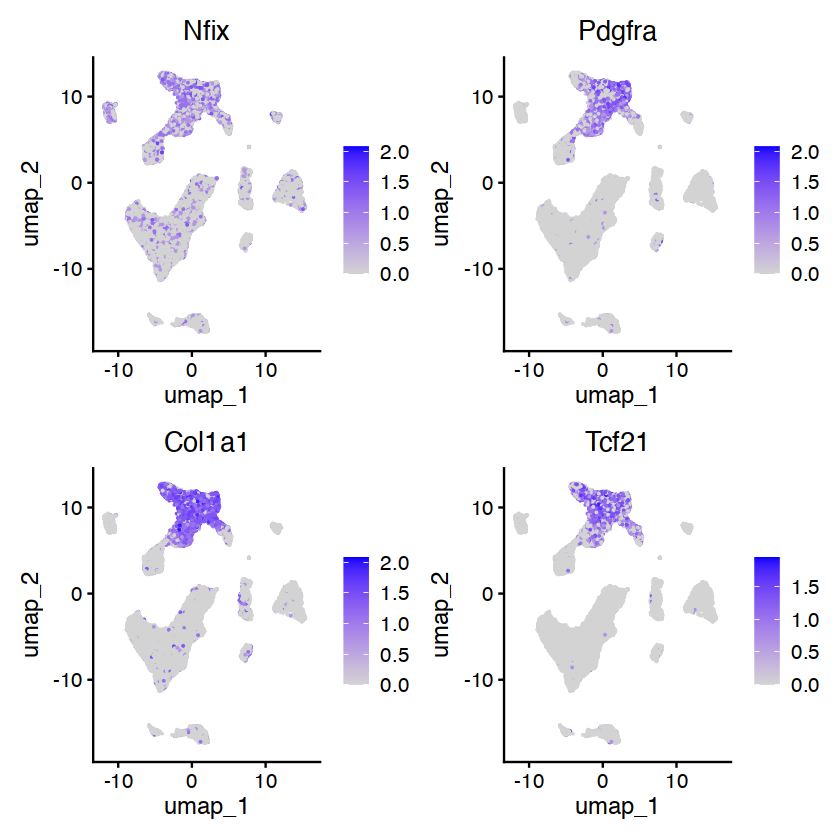

In [10]:
#Mesenchyme
DimPlot(pbmc, reduction = "umap", label =TRUE,raster=FALSE)
FeaturePlot(pbmc, features = c("Nfix","Pdgfra","Col1a1","Tcf21"),raster=FALSE)

In [11]:
colnames(pbmc[[]])
pbmc[["Louvain"]] = Idents(pbmc)
colnames(pbmc[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "nCount_SCT"       "nFeature_SCT"     "SCT_snn_res.0.5"  "seurat_clusters"

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "nCount_SCT"       "nFeature_SCT"     "SCT_snn_res.0.5"  "seurat_clusters" 
[21] "Louvain"

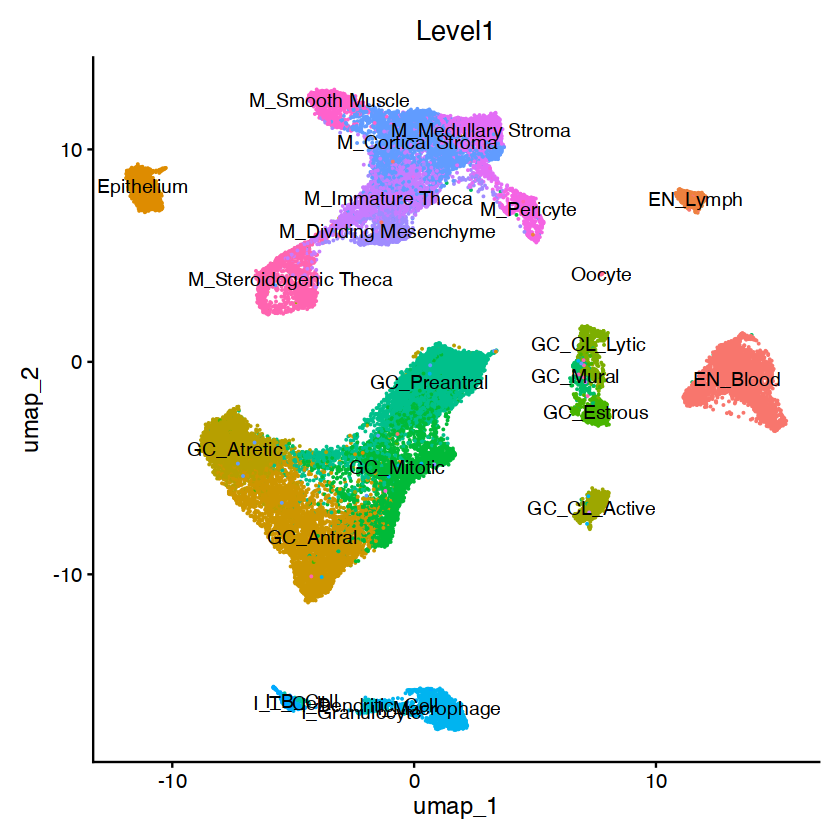

In [12]:
DimPlot(pbmc, reduction = "umap", group.by = "Level1", label = TRUE ,raster=FALSE) + NoLegend()

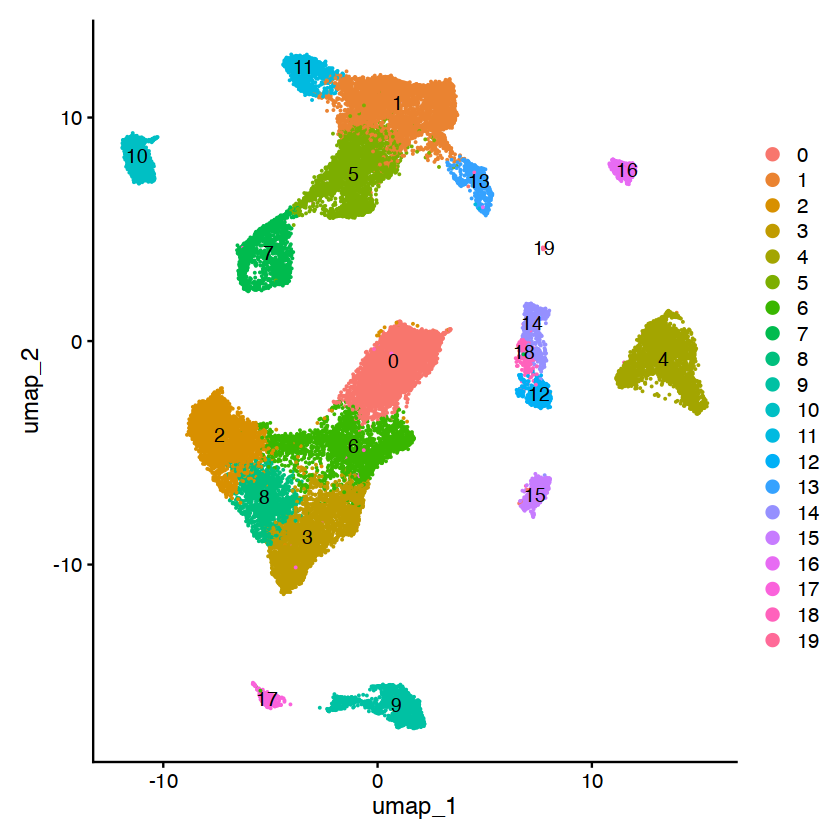

In [13]:
DimPlot(pbmc, reduction = "umap", label = TRUE ,raster=FALSE)

In [14]:
#Name cluster
pbmc <- RenameIdents(object = pbmc, "11" = "Mesenchyme")
pbmc <- RenameIdents(object = pbmc, "1" = "Mesenchyme")
pbmc <- RenameIdents(object = pbmc, "13" = "Mesenchyme")
pbmc <- RenameIdents(object = pbmc, "5" = "Mesenchyme")
pbmc <- RenameIdents(object = pbmc, "7" = "Mesenchyme")

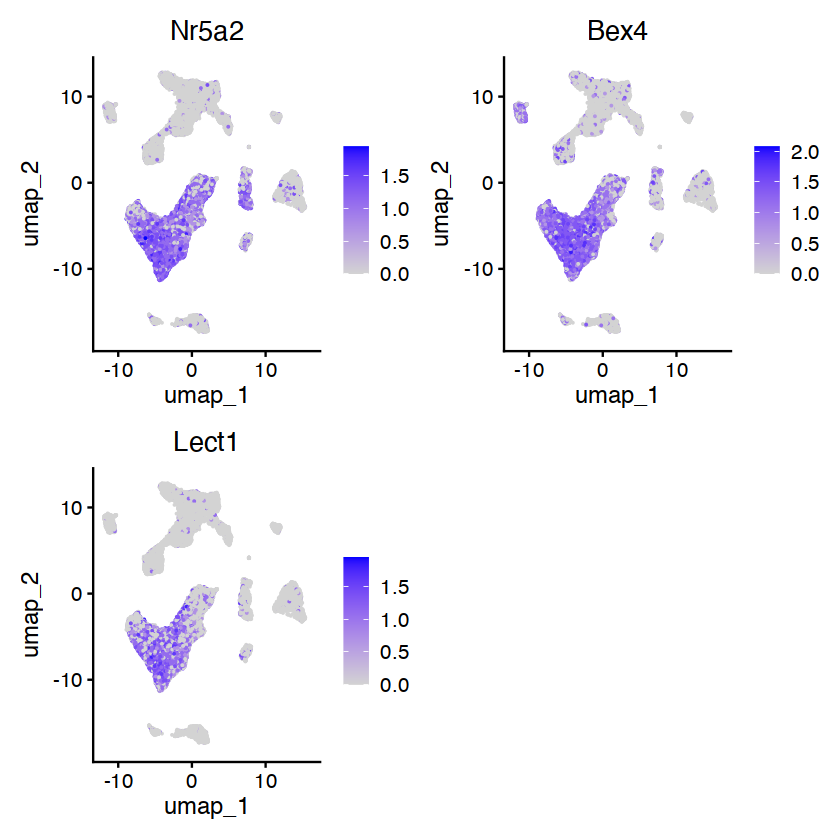

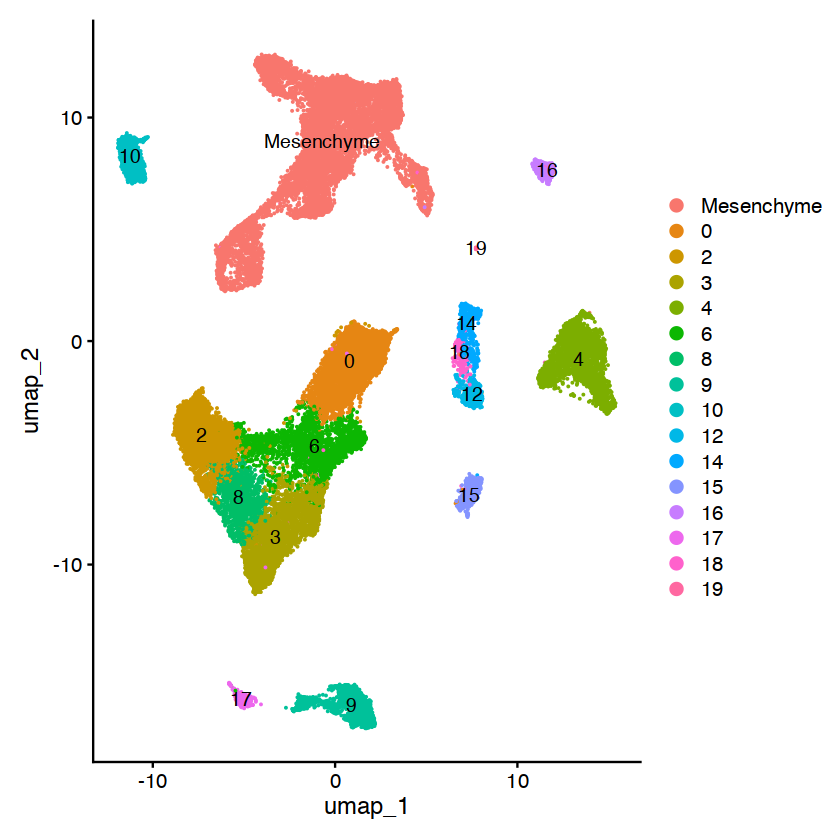

In [15]:
#Granulosa
FeaturePlot(pbmc, features = c("Nr5a2","Bex4","Lect1"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [21]:
#Name cluster
pbmc <- RenameIdents(object = pbmc, `18` = "Granulosa")
pbmc <- RenameIdents(object = pbmc, `12` = "Granulosa")
pbmc <- RenameIdents(object = pbmc, `2` = "Granulosa")
pbmc <- RenameIdents(object = pbmc, `8` = "Granulosa")
pbmc <- RenameIdents(object = pbmc, `3` = "Granulosa")
pbmc <- RenameIdents(object = pbmc, `6` = "Granulosa")
pbmc <- RenameIdents(object = pbmc, `0` = "Granulosa")


ERROR: Error in RenameIdents.Seurat(object = pbmc, `2` = "Granulosa"): Cannot find any of the provided identities


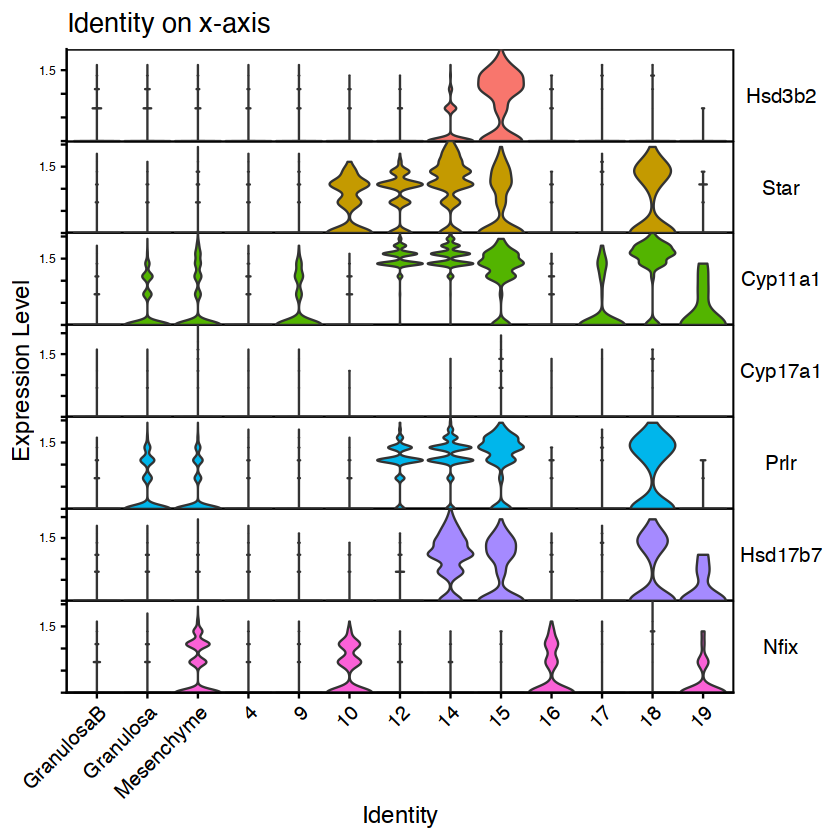

In [20]:
# Theca Lutein HSD3B2 StAR CYP11A1 CYP17A1
markerVLN <- c("Hsd3b2","Star","Cyp11a1","Cyp17a1","Prlr","Hsd17b7","Nfix")
p2<- VlnPlot(pbmc,markerVLN ,  stack = TRUE, sort = FALSE, flip = TRUE) +
            theme(legend.position = "none") + ggtitle("Identity on x-axis")
        print(p2)

In [22]:
pbmc <- RenameIdents(object = pbmc, `15` = "Luteal cells")
pbmc <- RenameIdents(object = pbmc, `14` = "Regressing corpus luteum")

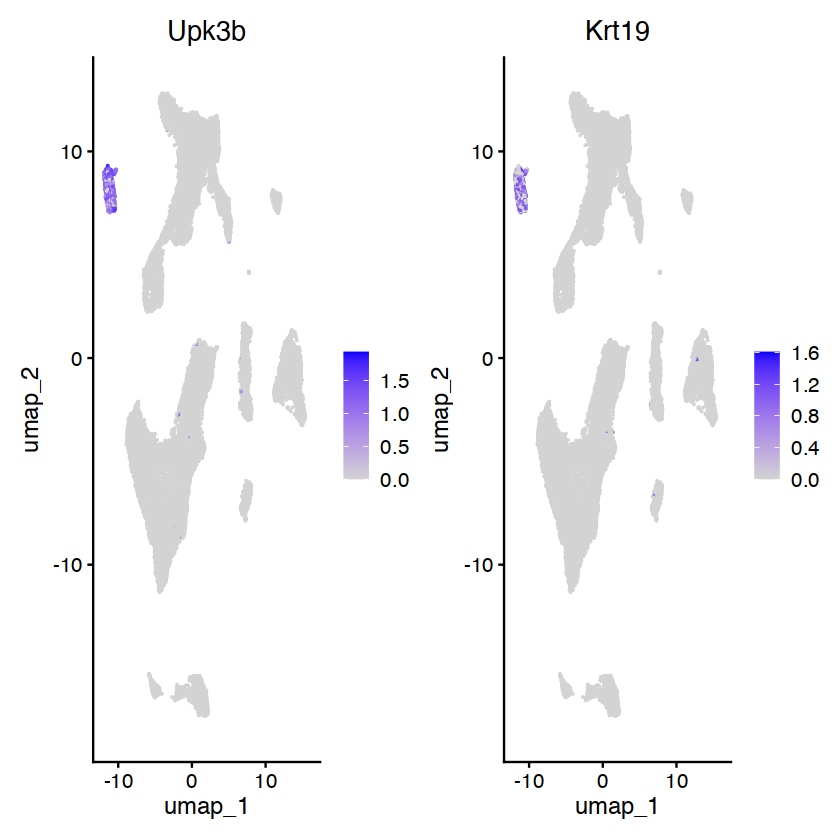

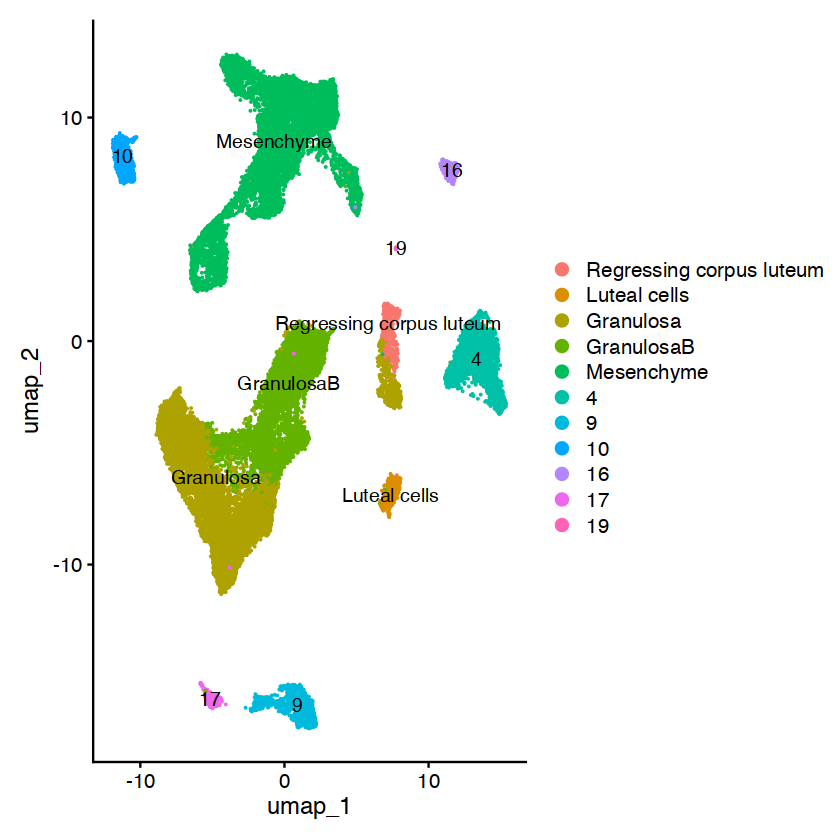

In [25]:
#Epithelial cells
FeaturePlot(pbmc, features = c("Upk3b","Krt19"))
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [28]:
pbmc <- RenameIdents(object = pbmc, `10` = "Epithelial cells")

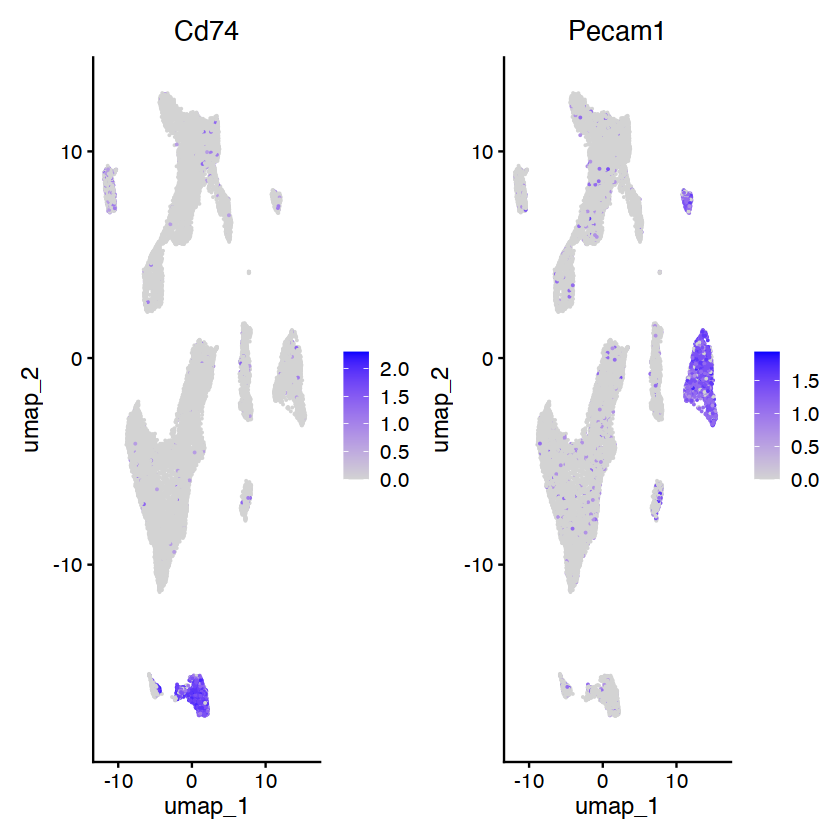

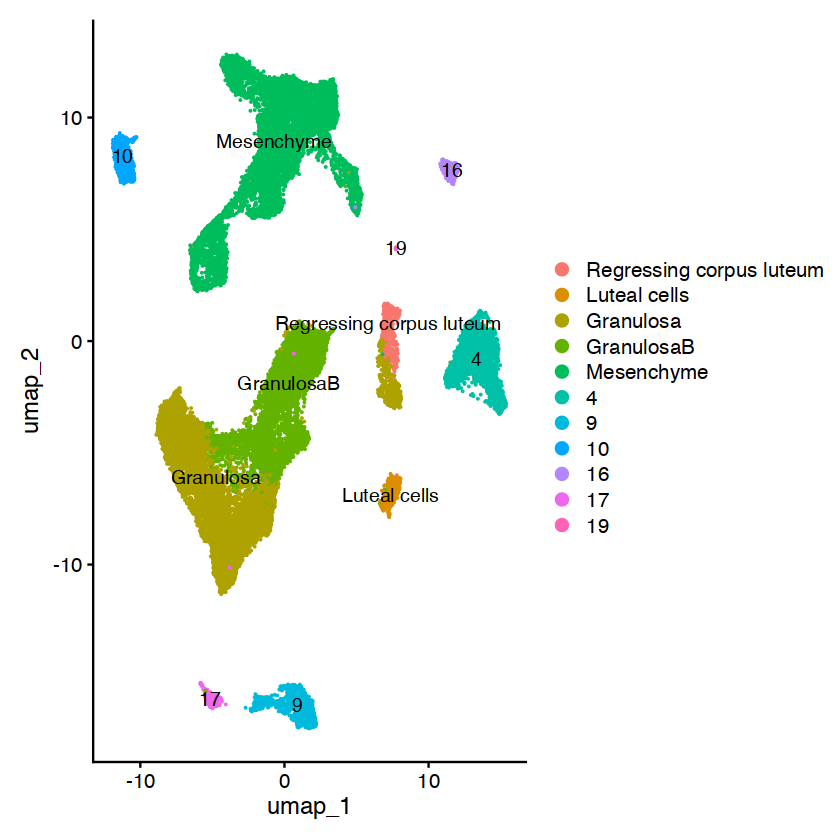

In [27]:
#Immune cells and Endothelium
FeaturePlot(pbmc, features = c("Cd74","Pecam1"))
DimPlot(pbmc, reduction = "umap", label =TRUE)


In [29]:
pbmc <- RenameIdents(object = pbmc, `9` = "Immune cells")
pbmc <- RenameIdents(object = pbmc, `4` = "Endothelial cells")

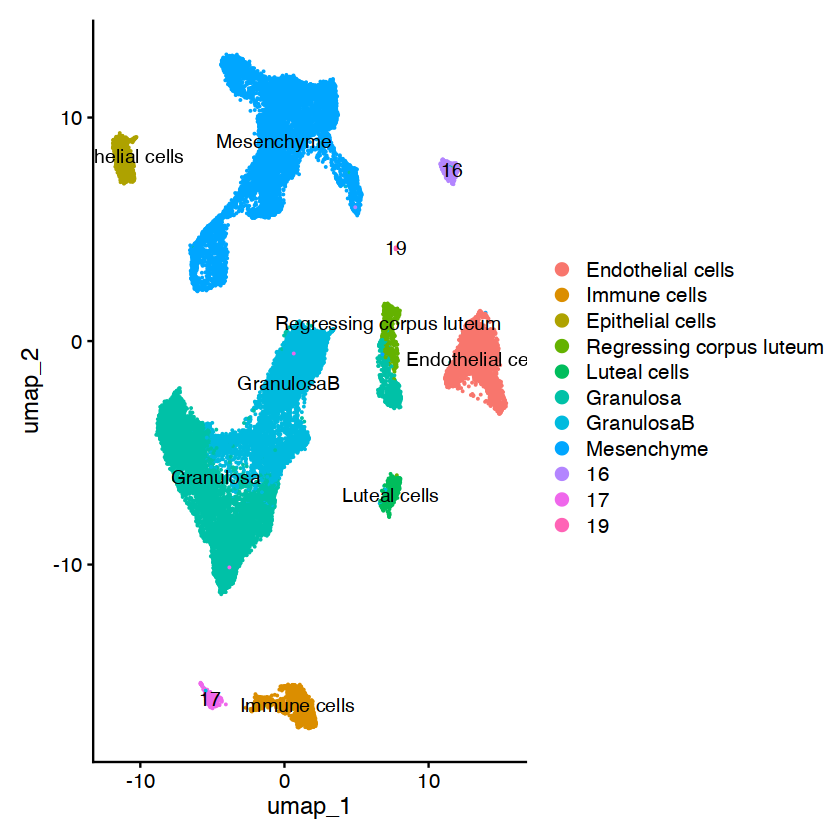

In [30]:
DimPlot(pbmc, reduction = "umap", label =TRUE)

In [31]:
#delete outlayers 
pbmc <- subset(pbmc, idents = c("19","16","17"), invert = TRUE)

In [32]:
colnames(pbmc[[]])
pbmc[["CellTypesAdult"]] = Idents(pbmc)
colnames(pbmc[[]])

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "nCount_SCT"       "nFeature_SCT"     "SCT_snn_res.0.5"  "seurat_clusters" 
[21] "Louvain"

[1] "nGene"            "nUMI"             "orig.ident"       "batch"           
 [5] "fraction.mito"    "condition"        "dominant_index"   "percent_dominant"
 [9] "Level0"           "doubletSimScore"  "doubletSimCall"   "mouse"           
[13] "Level1"           "Level2"           "nCount_RNA"       "nFeature_RNA"    
[17] "nCount_SCT"       "nFeature_SCT"     "SCT_snn_res.0.5"  "seurat_clusters" 
[21] "Louvain"          "CellTypesAdult"

In [33]:
pbmc
save(pbmc, file="data/morris-all.Rdata")

An object of class Seurat 
36228 features across 33838 samples within 2 assays 
Active assay: SCT (17773 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [34]:
colnames(pbmc[["CellTypesAdult"]])

[1] "CellTypesAdult"

we selected stroma progenitors and adult mesenchymal cells using markers such as Pdgfra, Col1a1, and Tcf21. Early progenitors were included based on the expression of Nr2f1. For the identification of steroidogenic theca cells, we relied on the expression of Cyp11a1 and Cyp17a1. Luteal cells were identified by the expression of Hsd3b2 and Star.


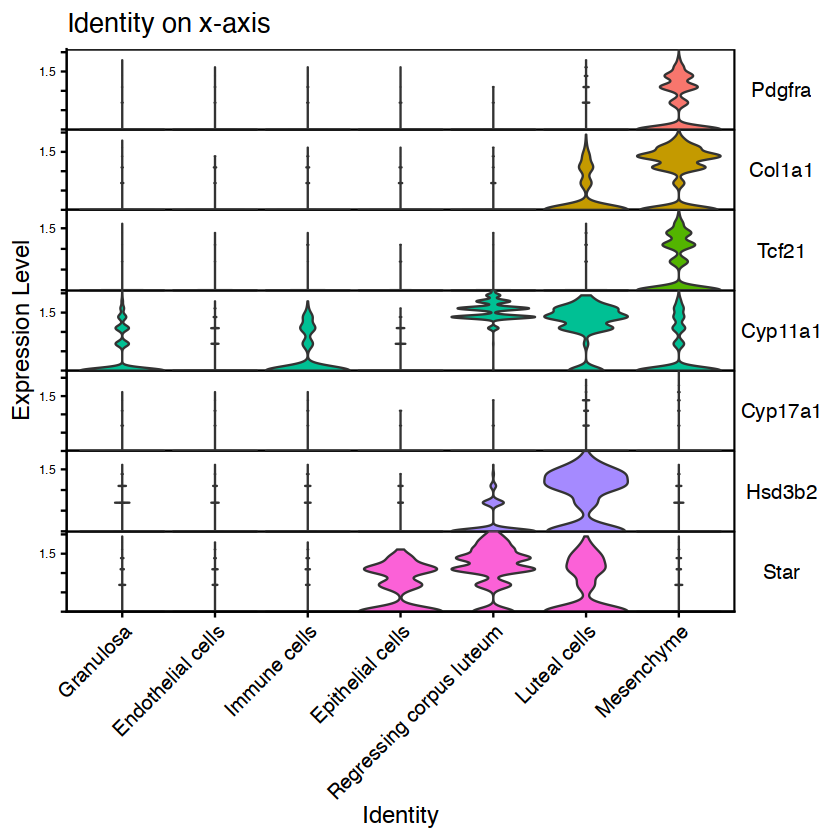

In [37]:
# Theca Lutein HSD3B2 StAR CYP11A1 CYP17A1
markerVLN <- c("Pdgfra","Col1a1","Tcf21","Cyp11a1","Cyp17a1","Hsd3b2","Star")
p2<- VlnPlot(pbmc,markerVLN ,  stack = TRUE, sort = FALSE, flip = TRUE) +
            theme(legend.position = "none") + ggtitle("Identity on x-axis")
        print(p2)

In [38]:
# subset mesenchymal, theca steroidogenic and luteal cells
pbmcM = subset(pbmc, idents = c('Mesenchyme','Luteal cells','Regressing corpus luteum'))

In [39]:
pbmcM <- SCTransform(pbmcM, ncells = 3000, verbose = FALSE)
pbmcM <- RunPCA(pbmcM)
pbmcM <- RunUMAP(pbmcM, dims = 1:20)
pbmcM <- FindNeighbors(pbmcM, reduction = "pca", dims = 1:20)
pbmcM <- FindClusters(pbmcM, resolution = 0.5)

Warning message:
“Different cells and/or features from existing assay SCT”
PC_ 1 
Positive:  Hsd3b1, Cyp11a1, Fdx1, Aldh1a1, Mgarp, Acsbg1, Prlr, Me1, Akr1cl, Scarb1 
	   Star, Tmem86a, Cyp17a1, Hao2, Efhd1, Idh1, Prss35, Gja1, Folr1, Clu 
	   Sfrp4, Gramd1b, Soat1, Fdxr, Lhcgr, Msmo1, Hmgcs1, Ptgfr, Elovl5, Dnajc15 
Negative:  Mgp, Col1a1, Bgn, Col1a2, Sparcl1, Cfh, Mylk, Acta2, Fstl1, Dcn 
	   Ogn, Ltbp4, Tcf21, Igfbp7, Col4a1, Itih5, Col4a2, Serping1, Thbs1, Cygb 
	   Col3a1, Lum, Id3, Tmsb4x, Cyp1b1, Cxcl14, Tagln, Csrp1, Pdgfra, Timp2 
PC_ 2 
Positive:  Onecut2, Nkain3, Sfrp4, Gm21897, Plin4, Ttf1, Lin54, Hsd3b2, Gm17615, Cemip 
	   Gm21750, Mme, Sgk1, Unc13d, Ptgfr, Spata1, Dock7, Ccdc62, Pkib, Prdm11 
	   Csf3r, Rmi2, Tnc, Fam13a, Pex1, Rab33b, Als2, Runx2, Nav2, Ccnt2 
Negative:  Aldh1a1, Gstm1, Mgarp, Smoc2, Acsbg1, Hspe1, Cox6c, Stc1, Cox4i1, Gstm2 
	   Atp5g3, Gas6, Folr1, Serpina5, Cox6a1, Cyp17a1, Prss35, Mt1, Tmem176b, Me1 
	   Cpe, Dnajc15, Cox7c, Pkdcc, Pebp1, Osr2, Cox

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12165
Number of edges: 439306

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9011
Number of communities: 12
Elapsed time: 1 seconds


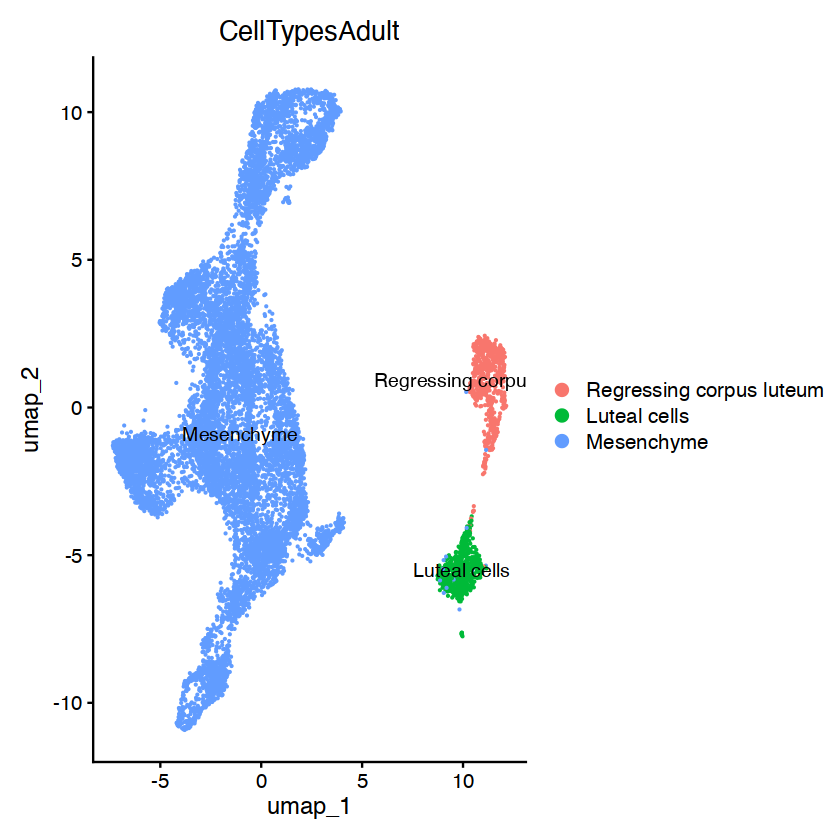

In [41]:
DimPlot(pbmcM, reduction = "umap", group.by = "CellTypesAdult", label =TRUE)

In [42]:
pbmcM
save(pbmcM, file="data/ovaryAdult-mesenchyme-named.Rdata")

An object of class Seurat 
32364 features across 12165 samples within 2 assays 
Active assay: SCT (13909 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap